In [1]:
import cv2 as cv
import pandas as pd 
import numpy as np
import os
import glob
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.neighbors  import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from collections import defaultdict
import random
import dlib
import argparse
import sys
import time


In [2]:
EDA_dict = defaultdict(list)
X_raw = []
Y_raw = []

In [3]:
def EDA_df(file_name,classes,length,widht,d):
    EDA_dict['file_name'].append(file_name)
    EDA_dict['length'].append(length)
    EDA_dict['widht'].append(widht)
    EDA_dict['resolution'].append(length*widht)
    EDA_dict['dimension'].append(d)
    EDA_dict['classes'].append(classes)

def grayscale(img):
    imgs = np.array(cv.imread(img))
    # converting BGR to RGB
    img_rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
    return gray

def flat(img):
    pixel = img.flatten()
    return pixel

def resizeforHOG(img):
    resize_img = cv.resize(img,(128,64))
    feature , hog_img= hog(resize_img, pixels_per_cell=(8, 8),cells_per_block=(2, 2),visualize=True)
    return feature, hog_img

def only_resize(img):
    resize_img = cv.resize(img,(64,64))
    return resize_img


-------
## Testing CNN HOG Face Detector And Save image in testimage Folder

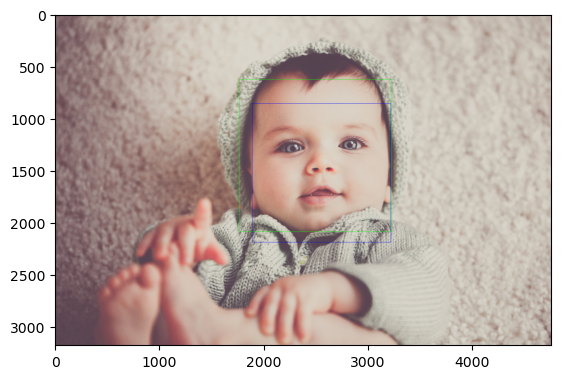

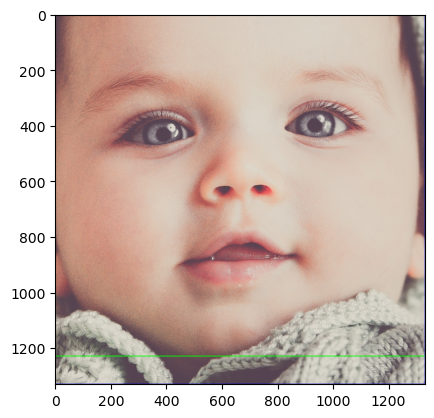

' cv.imshow("face detection with dlib", image_rgb)\ncv.waitKey(0)\n\n# save output image \n\n#cv.imwrite(\'./testimage/\' + \'hog_face_detection.jpg\',cv.cvtColor(faces_hog, cv.COLOR_RGB2BGR))\n# close all windows\ncv.destroyAllWindows() \ncv.waitKey(1)   '

In [3]:
image = cv.imread('imgs/Test/happy/1happy266004.jpg')
#2angry5332417
#1sad2847590
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# CNN
detector_CNN = dlib.cnn_face_detection_model_v1('mmod_human_face_detector.dat')
# SVM + HOG
detector_HOG = dlib.get_frontal_face_detector()
start = time.time()
CNN_box= detector_CNN(image_rgb)
end = time.time()

start = time.time()
HOG_box = detector_HOG(image_rgb)
end = time.time()

# loop over detected faces
for face in CNN_box:
    x = face.rect.left()
    y = face.rect.top()
    w = face.rect.right() - x
    h = face.rect.bottom() - y 

    cv.rectangle(image_rgb, (x,y), (x+w,y+h), (0,255,0), 2)
    faces_cnn = image_rgb[y:y + h, x:x + w] 
 
for face in HOG_box:
    x = face.left()
    y = face.top()
    w = face.right() - x
    h = face.bottom() - y

    cv.rectangle(image_rgb, (x,y), (x+w,y+h), (0,0,255), 2)
    faces_hog = image_rgb[y:y + h, x:x + w] 
 
""" img_height, img_width = image_rgb.shape[:2]
cv.putText(image_rgb, "HOG", (img_width-50,20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2) 
cv.putText(image_rgb, "CNN", (img_width-50,40), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 2)  """

plt.imshow(image_rgb)
plt.show()
plt.imshow(faces_hog)
plt.show() 
""" plt.imshow(faces_cnn)
plt.show() """  
# display output image
""" cv.imshow("face detection with dlib", image_rgb)
cv.waitKey(0)

# save output image 

#cv.imwrite('./testimage/' + 'hog_face_detection.jpg',cv.cvtColor(faces_hog, cv.COLOR_RGB2BGR))
# close all windows
cv.destroyAllWindows() 
cv.waitKey(1)   """

-----------
## Testing Cascade Face Detector And Save image in testimage Folder

(64, 64)
[[ 29  29  29 ...  29  29  29]
 [ 29 146 118 ... 201 195  29]
 [ 29 184 103 ... 187 209  29]
 ...
 [ 29  93 127 ... 184 174  29]
 [ 29  77 131 ... 188 187  29]
 [ 29  29  29 ...  29  29  29]]


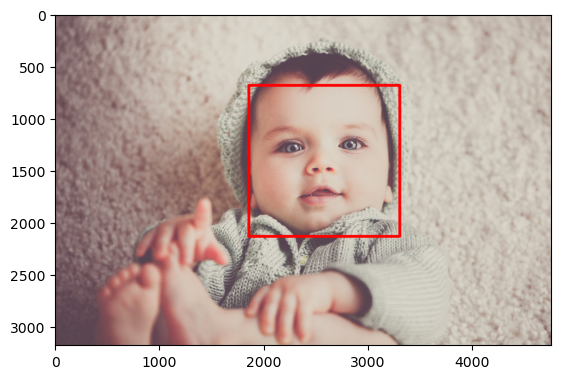

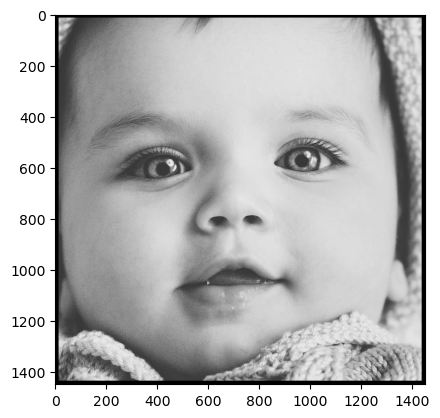

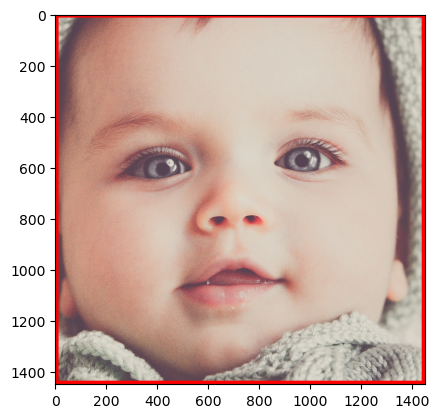

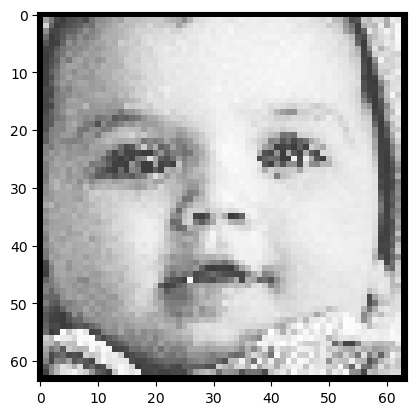

True

In [4]:
a=[]
b=[]
#266004
#774866
#1happy2167673
imgs = np.array(cv.imread('imgs/Test/happy/1happy266004.jpg'))
# converting BGR to RGB
img_rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
mountCascade = cv.CascadeClassifier('haarcascade_mcs_mouth.xml')
faceCascade = cv.CascadeClassifier('haarcascade_frontalface_alt.xml')
gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(img_rgb,scaleFactor = 1.05, minNeighbors = 5, minSize = (50,50))
for (x, y, w, h) in faces:
    cv.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0 , 0), 25)
    faces = img_rgb[y:y + h, x:x + w]
faces_gray  = cv.cvtColor(faces, cv.COLOR_BGR2GRAY)
resize_img = cv.resize(faces_gray,(64,64))
pixel = resize_img.flatten()
a.append(resize_img)
print(resize_img.shape)
print(a[0])
plt.imshow(img_rgb)
plt.show()
plt.imshow(faces_gray,cmap="gray")
plt.show()
plt.imshow(faces)
plt.show()
plt.imshow(resize_img,cmap="gray")
plt.show()

cv.imwrite('./testimage/' + 'baby.jpg',cv.cvtColor(faces, cv.COLOR_RGB2BGR))


------------
# Cascade Face Detector

In [4]:

def chopped(img):
    imgs = np.array(cv.imread(img))
    # converting BGR to RGB
    img_rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    mountCascade = cv.CascadeClassifier('haarcascade_mcs_mouth.xml')
    faceCascade = cv.CascadeClassifier('haarcascade_frontalface_alt.xml')
    gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(img_rgb,scaleFactor = 1.03, minNeighbors = 6, minSize = (100,100))
    for (x, y, w, h) in faces:
        cv.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0 , 0), 25)
        faces = img_rgb[y:y + h, x:x + w]
    return faces

for i, happy in enumerate(glob.glob('imgs/Test/happy/*happy*.jpg')):  
    if i <= 10000:
        try:
            classes = 'happy'
            # Store file name
            file_path = happy
            file_name = os.path.basename(file_path)
            # read image
            imgs = np.array(cv.imread(happy))
            pixels = flat(imgs)
            length, widht, d = imgs.shape
            # append info. into dictionary 
            EDA_df(file_name,classes,length,widht,d)
            #X_raw.append(pixels)
            #Y_raw.append(classes)
            #chopped_face = chopped(happy)
            #cv.imwrite(f'./happy_choppedface/{file_name}',cv.cvtColor(chopped_face, cv.COLOR_RGB2BGR)) 
        except Exception:
            pass

for i, sad in enumerate(glob.glob('imgs/Test/sad/*sad*.jpg')):
    if i <= 10000:
        try:
            classes = 'sad'
            # Store file name
            file_path = sad
            file_name = os.path.basename(file_path)
            # read image
            imgs = np.array(cv.imread(sad))
            pixels = flat(imgs)
            length, widht, d = imgs.shape
            # append info. into dictionary 
            EDA_df(file_name,classes,length,widht,d)
            #X_raw.append(pixels)
            #Y_raw.append(classes)
            #chopped_face = chopped(sad)
            #cv.imwrite(f'./sad_choppedface/{file_name}',cv.cvtColor(chopped_face, cv.COLOR_RGB2BGR))
        except Exception:
            pass 




# HOG + SVM Face Detector

In [5]:
""" # CNN Face Detector
def cnn(img):
    imgs = np.array(cv.imread(img))
    # converting BGR to RGB
    img_rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    detector_CNN = dlib.cnn_face_detection_model_v1('mmod_human_face_detector.dat')
    start = time.time()
    CNN_box= detector_CNN(img_rgb)
    end = time.time()

    for face in CNN_box:
        x = face.rect.left()
        y = face.rect.top()
        w = face.rect.right() - x
        h = face.rect.bottom() - y 

        cv.rectangle(img_rgb, (x,y), (x+w,y+h), (0,255,0), 2)
        faces_cnn = img_rgb[y:y + h, x:x + w]
    
    return faces_cnn

# HOG Face Deteccor
def hog(img):
    imgs = np.array(cv.imread(img))
    # converting BGR to RGB
    img_rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    detector_HOG = dlib.get_frontal_face_detector()
    start = time.time()
    HOG_box = detector_HOG(img_rgb)
    end = time.time()   
    for face in HOG_box:
        x = face.left()
        y = face.top()
        w = face.right() - x
        h = face.bottom() - y

        cv.rectangle(img_rgb, (x,y), (x+w,y+h), (0,0,255), 2)
        faces_hog = img_rgb[y:y + h, x:x + w] 
    return faces_hog
 """


""" for i, happy in enumerate(glob.glob('imgs/Test/happy/*happy*.jpg')
        classes = 'happy'
        # Store file name
        file_path = happy
        file_name = os.path.basename(file_path)
        # read image
        imgs = np.array(cv.imread(happy))
        length, widht, d = imgs.shape
        # append info. into dictionary 
        EDA_df(file_name,classes,length,widht,d)
        chopped_face = chopped(happy)
        cv.imwrite(f'./happy_cnn/{file_name}',cv.cvtColor(chopped_face, cv.COLOR_RGB2BGR))
    except Exception:
        pass

for i, sad in enumerate(glob.glob('imgs/Test/sad/*sad*.jpg')):
    try:
        classes = 'sad'
        # Store file name
        file_path = sad
        file_name = os.path.basename(file_path)
        # read image
        imgs = np.array(cv.imread(sad))
        length, widht, d = imgs.shape
        # append info. into dictionary 
        EDA_df(file_name,classes,length,widht,d)
        chopped_face = chopped(sad)
        cv.imwrite(f'./sad_cnn/{file_name}',cv.cvtColor(chopped_face, cv.COLOR_RGB2BGR))
    except Exception:
        pass   """

for i, angry in enumerate(glob.glob('imgs/Test/angry/*angry*.jpg')):
    if i < 10000:
        try:
            classes = 'angry'
            # Store file name
            file_path = angry
            file_name = os.path.basename(file_path)
            imgs = np.array(cv.imread(angry))
            pixels = flat(imgs)
            length, widht, d = imgs.shape
            # append info. into dictionary 
            EDA_df(file_name,classes,length,widht,d)
            #X_raw.append(pixels)
            #Y_raw.append(classes)
            #hog_face = hog(angry)
            #cv.imwrite(f'./angry_hog/{file_name}',cv.cvtColor(hog_face, cv.COLOR_RGB2BGR))
        except Exception:
            #file_path = angry
            #file_name = os.path.basename(file_path)
            #print(file_name)
            pass

for i, angry2 in enumerate(glob.glob('imgs/Test/angry_google/angry*.jpg')):
    if i < 10000:
        try:
            classes = 'angry'
            # Store file name
            file_path = angry2
            file_name = os.path.basename(file_path)
            imgs = np.array(cv.imread(angry2))
            pixels = flat(imgs)
            length, widht, d = imgs.shape
            # append info. into dictionary 
            EDA_df(file_name,classes,length,widht,d)
            #X_raw.append(pixels)
            #Y_raw.append(classes)
            #hog_face = hog(angry)
            #cv.imwrite(f'./angry_hog/{i}{file_name}',cv.cvtColor(hog_face, cv.COLOR_RGB2BGR))
        except Exception:
            #file_path = angry2
            #file_name = os.path.basename(file_path)
            #print(file_name)
            pass


libpng warning: iCCP: known incorrect sRGB profile


### Gray Scale to 1D Array with HOG and Regular Resize Image

In [25]:
def grayscale(img):
    imgs = np.array(cv.imread(img))
    # converting BGR to RGB
    img_rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
    return gray

def flat(img):
    pixel = img.flatten()
    return pixel

def resizeforHOG(img):
    resize_img = cv.resize(img,(128,64))
    feature , hog_img= hog(resize_img, pixels_per_cell=(8, 8),cells_per_block=(2, 2),visualize=True)
    return feature, hog_img

def only_resize(img):
    resize_img = cv.resize(img,(64,64))
    return resize_img


In [19]:
# Matrix 1D Array
X = []
y = []

# HOG Matrix 1D Array With Normailize from (0,1)
X_HOG = []
y_HOG = []


for i, happy in enumerate(glob.glob('happy_choppedface/*happy*.jpg')):
    try:
        #if i < 100:
        classes = 'happy'
        gray = grayscale(happy)

        # Only resize and flatten without normailiz
        resize = only_resize(gray)
        pixel = flat(resize)
        X.append(pixel)
        y.append(classes)
        # HOG with 1d Array and Normailize from (0,1)
        HOG , img_HOG = resizeforHOG(gray)
        X_HOG.append(HOG)
        y_HOG.append(classes)
    except Exception:
        pass

for i, sad in enumerate(glob.glob('sad_choppedface/*sad*.jpg')):
    try:    
        classes = 'sad'
        gray = grayscale(sad)

        # Only resize and flatten without normailiz
        resize = only_resize(gray)
        pixel = flat(resize)
        X.append(pixel)
        y.append(classes)
        # HOG with 1d Array and Normailize from (0,1)
        HOG , img_HOG = resizeforHOG(gray)
        X_HOG.append(HOG)
        y_HOG.append(classes)

    except Exception:
        pass

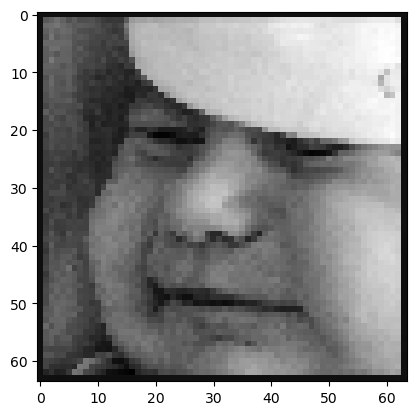

(4096,)
[30 29 29 ... 29 30 29]


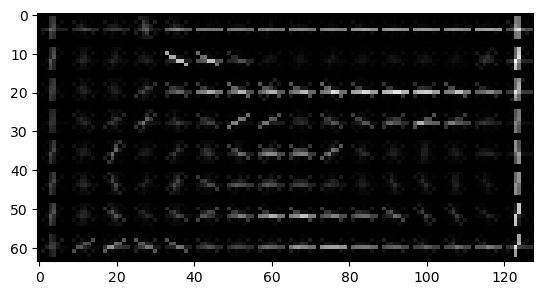

(3780,)
[0.34461577 0.05176177 0.17126353 ... 0.01839207 0.01311326 0.01881326]


In [21]:
for i, happy in enumerate(glob.iglob('sad_choppedface/10sad7282622.jpg')):

    gray = grayscale(happy)

    # Only resize and flatten without normailiz
    resize = only_resize(gray)
    pixel = flat(resize)
    plt.imshow(resize,cmap="gray")
    plt.show()
    print(pixel.shape)
    print(pixel)

    # HOG with 1d Array and Normailize from (0,1)
    HOG ,img_HOG = resizeforHOG(gray)
    plt.imshow(img_HOG,cmap="gray")
    plt.show()
    print(HOG.shape)
    print(HOG)

In [7]:
df = pd.DataFrame.from_dict(EDA_dict)

In [8]:
df.describe()


,length,widht,resolution,dimension
count,2327.000000,2327.000000,2.327000e+03,2327.0
mean,4444.296519,4313.709067,2.012743e+07,3.0
std,1594.592657,1613.476416,9.449735e+06,0.0
min,146.000000,180.000000,3.314200e+04,3.0
25%,3645.000000,3456.000000,1.428886e+07,3.0
50%,4419.000000,4000.000000,2.201923e+07,3.0
75%,5760.000000,5628.500000,2.416026e+07,3.0
max,10846.000000,11200.000000,8.374240e+07,3.0


Text(0, 0.5, 'Number of images')

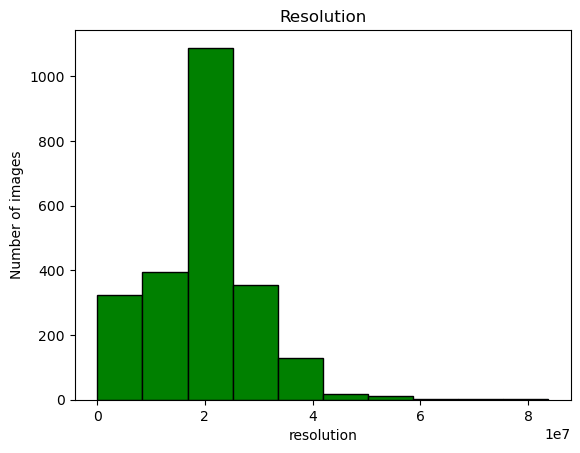

In [9]:
df['resolution'].plot(kind="hist", color = 'green', edgecolor = 'black')
plt.title("Resolution")
plt.xlabel("resolution")
plt.ylabel("Number of images")


Text(0, 0.5, 'resolution')

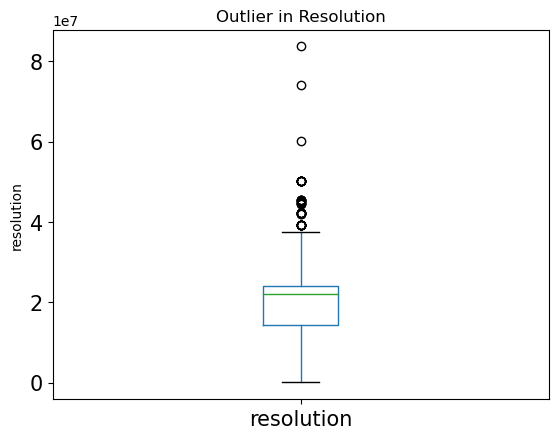

In [10]:
boxplot = df.boxplot(column = 'resolution', grid=False, fontsize=15)  
plt.title("Outlier in Resolution")
plt.ylabel("resolution")


classes
angry    888
happy    639
sad      800
Name: classes, dtype: int64


Text(0, 0.5, 'Number of images')

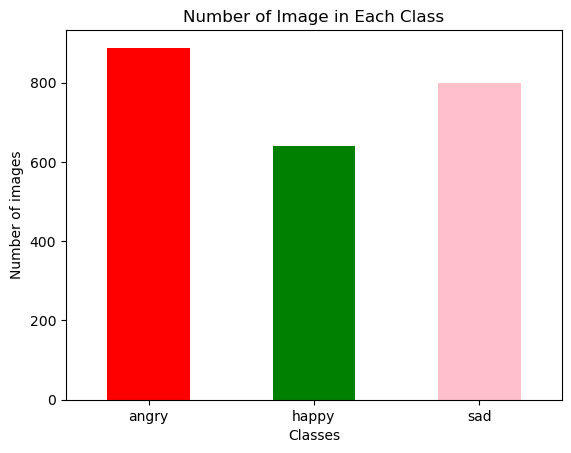

In [11]:
df2 = df.groupby(['classes'])['classes'].count()
print(df2)
df2.plot(kind="bar",color = (['red','green','pink']))

plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Number of Image in Each Class")
plt.xlabel("Classes")
plt.ylabel("Number of images")

In [11]:
import csv
with open('rawImage.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerows(X_raw)

In [34]:
len(X_raw[0])

18874368

In [29]:
Y_raw

[0, 0, 1, 1, 2, 2]